In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('../data/page-blocks0.dat')

In [3]:
df.columns

Index(['Height', ' Lenght', ' Area', ' Eccen', ' P_black', ' P_and',
       ' Mean_tr', ' Blackpix', ' Blackand', ' Wb_trans', 'Outcome'],
      dtype='object')

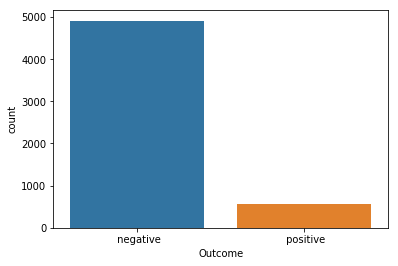

In [4]:
%matplotlib inline
sns.countplot(x='Outcome',data=df)

In [5]:
df_min=df[df['Outcome']==' positive']

In [6]:
df_majority=df[df['Outcome']==' negative']

In [7]:
df_min.to_csv('page-blocks0_minority.csv',index=False)
df_majority.to_csv('page-blocks0_majority.csv',index=False)

In [8]:
data=np.array(df.values)

pos=data.shape[1]-1

for i in range(data.shape[0]):
    if data[i][pos]==' negative':
        data[i][pos]=0
    else:
        data[i][pos]=1


min_data=np.array(df_min)
maj_data=np.array(df_majority)

In [10]:
validation=0.30
seed=9

In [11]:
data.shape

(5472, 11)

In [12]:
df_min.shape

(559, 11)

In [13]:
min_data.shape

(559, 11)

In [14]:
maj_data.shape

(4913, 11)

In [15]:
data[:1,:10]

array([[5, 7, 35.0, 1.4, 0.4, 0.657, 2.33, 14, 23, 6]], dtype=object)

In [16]:
X=data[:,:10].astype(float)# getting the feature values
Y=data[:,10]# getting prediction

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=validation,random_state=seed)

In [18]:
X_train.shape

(3830, 10)

In [19]:
Y_train=Y_train.reshape((Y_train.shape[0],1))

In [20]:
Y_train.shape

(3830, 1)

In [21]:
train_Data=np.concatenate((X_train,Y_train),axis=1)

In [22]:
train_Data[:10]

array([[8.0, 9.0, 72.0, 1.125, 0.319, 0.639, 2.09, 23.0, 46.0, 11.0, 0],
       [11.0, 96.0, 1056.0, 8.727, 0.331, 0.9540000000000001, 4.32,
        350.0, 1007.0, 81.0, 0],
       [3.0, 11.0, 33.0, 3.667, 0.364, 0.667, 3.0, 12.0, 22.0, 4.0, 1],
       [9.0, 107.0, 963.0, 11.889000000000001, 0.38299999999999995,
        0.858, 2.22, 369.0, 826.0, 166.0, 0],
       [10.0, 19.0, 190.0, 1.9, 0.568, 0.774, 9.82, 108.0, 147.0, 11.0,
        0],
       [6.0, 14.0, 84.0, 2.333, 0.28600000000000003, 1.0, 1.2, 24.0,
        84.0, 20.0, 0],
       [8.0, 71.0, 568.0, 8.875, 0.32899999999999996, 0.7759999999999999,
        1.83, 187.0, 441.0, 102.0, 0],
       [7.0, 44.0, 308.0, 6.2860000000000005, 0.16899999999999998, 0.455,
        1.58, 52.0, 140.0, 33.0, 0],
       [8.0, 37.0, 296.0, 4.625, 0.375, 0.753, 2.22, 111.0, 223.0, 50.0,
        0],
       [9.0, 12.0, 108.0, 1.3330000000000002, 0.62, 0.9440000000000001,
        4.79, 67.0, 102.0, 14.0, 0]], dtype=object)

In [23]:
Y_test=Y_test.reshape((Y_test.shape[0],1))

In [24]:
test_Data=np.concatenate((X_test,Y_test),axis=1)

In [25]:
train_Data=DataFrame(train_Data)
test_Data=DataFrame(test_Data)

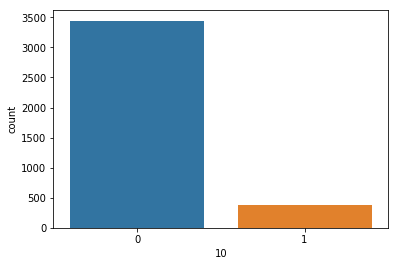

In [26]:
%matplotlib inline
sns.countplot(x=10,data=train_Data)

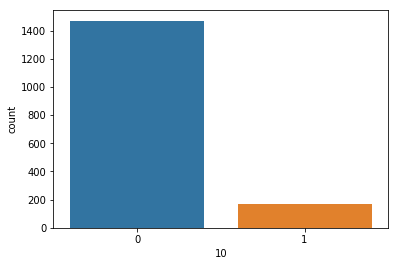

In [27]:
%matplotlib inline
sns.countplot(x=10,data=test_Data)

In [28]:
train_Data

,0,1,2,3,4,5,6,7,8,9,10
0,8,9,72,1.125,0.319,0.639,2.09,23,46,11,0
1,11,96,1056,8.727,0.331,0.954,4.32,350,1007,81,0
2,3,11,33,3.667,0.364,0.667,3,12,22,4,1
3,9,107,963,11.889,0.383,0.858,2.22,369,826,166,0
4,10,19,190,1.9,0.568,0.774,9.82,108,147,11,0
5,6,14,84,2.333,0.286,1,1.2,24,84,20,0
6,8,71,568,8.875,0.329,0.776,1.83,187,441,102,0
7,7,44,308,6.286,0.169,0.455,1.58,52,140,33,0
8,8,37,296,4.625,0.375,0.753,2.22,111,223,50,0
9,9,12,108,1.333,0.62,0.944,4.79,67,102,14,0


In [29]:
train_Data.to_csv('train_Data.csv',index=False)
test_Data.to_csv('test_Data.csv',index=False)